In [5]:
#import csv file
import pandas as pd
df=pd.read_csv("C:\\Users\\01\\Desktop\\.ipynb_checkpoints\\AmazonReviews.csv")
df.head()

# Create a unique ID for each review
df['Review_id'] = ['R' + str(i+1) for i in range(len(df))]

# Keep only the useful columns
useful_cols = [
    "Reviewer_name",
    "Review_rating",
    "Review_title",
    "Review_content",
    "Is_verified",
    "Helpful_count",
    "Date", 
    "Review_id"
]

df = df[useful_cols]

# Convert review content to string (avoid errors later)
df['Review_content'] = df['Review_content'].astype(str)# Check the first few rows

df.head()

,Reviewer_name,Review_rating,Review_title,Review_content,Is_verified,Helpful_count,Date,Review_id
0,FC,5.0,Good quality,"Nice color, good quality, amazing price, it fi...",True,1.0,"September 9, 2025",R1
1,J. Hanney,5.0,A beautiful item,I'm delighted with the solid construction of t...,True,1.0,"August 19, 2025",R2
2,L. Weeks,5.0,iPad cover for iPad 2025,This is a wonderful cover exactly what I neede...,True,1.0,"September 8, 2025",R3
3,Vespaboy1968,4.0,Protect your apple investment,I fine and sturdy case that is very attractive...,True,3.0,"August 11, 2025",R4
4,Michael Haydon,5.0,Fits the Bill Nicely,Quick delivery and arrived in good condition. ...,True,1.0,"August 7, 2025",R5


In [6]:
#Convert date column to datetime and extract year and months
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['Date'])

# Now extract Year and Month safely
df['Year'] = df['Date'].dt.year.astype(int)
df['Month'] = df['Date'].dt.month.astype(int)
df['Month_name'] = df['Date'].dt.strftime('%B')

# Check result
df['Date'].head()

#Check the extracted dates
df[['Date', 'Year', 'Month', 'Month_name']].sample(10)

,Date,Year,Month,Month_name
409,2025-08-10,2025,8,August
666,2024-08-29,2024,8,August
578,2025-05-17,2025,5,May
874,2025-06-20,2025,6,June
413,2025-07-06,2025,7,July
596,2025-04-21,2025,4,April
418,2025-07-02,2025,7,July
141,2025-06-02,2025,6,June
198,2025-06-28,2025,6,June
701,2025-06-10,2025,6,June


In [7]:
#Check for missing values
print(df.isnull().sum())

#Check for unique values
df.nunique()

Reviewer_name       0
Review_rating       0
Review_title        0
Review_content      0
Is_verified         0
Helpful_count     729
Date                0
Review_id           0
Year                0
Month               0
Month_name          0
dtype: int64


Reviewer_name     900
Review_rating       5
Review_title      851
Review_content    939
Is_verified         2
Helpful_count      19
Date              440
Review_id         956
Year                4
Month              12
Month_name         12
dtype: int64

In [8]:
#Handling missing values

#fill missing review_title with palceholders
df['Review_title']=df['Review_title'].fillna("NaN")

In [9]:
print(df.columns)

Index(['Reviewer_name', 'Review_rating', 'Review_title', 'Review_content',
       'Is_verified', 'Helpful_count', 'Date', 'Review_id', 'Year', 'Month',
       'Month_name'],
      dtype='object')


In [10]:
import sys
print(sys.executable)

C:\Program Files\Python313\python.exe


<Axes: title={'center': 'Review Rating'}, xlabel='Review_rating'>

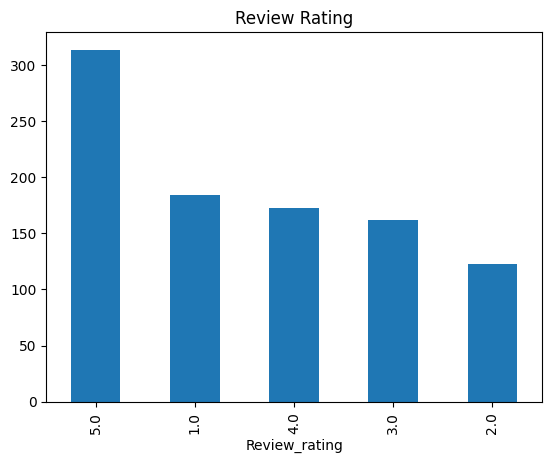

In [11]:
#Review Rating
df['Review_rating'].describe()
df['Review_rating'].value_counts().plot(kind='bar',title="Review Rating")

In [12]:
#Is verified
df['Is_verified'].value_counts()
df.groupby('Is_verified')['Review_rating'].mean()

Is_verified
False    2.827586
True     3.339806
Name: Review_rating, dtype: float64

<Axes: title={'center': 'Trend of Rating Over Time'}, xlabel='Year'>

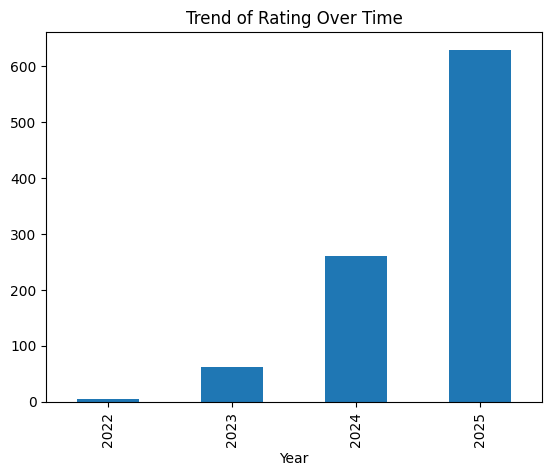

In [13]:
#Tend of rating over time
df['Year'].value_counts().sort_index().plot(kind='bar',title="Trend of Rating Over Time")

In [14]:
#Review count
df['Review_length'] = df['Review_content'].apply(lambda x: len(str(x).split()))
df['Review_length'].describe()

count    956.000000
mean      27.783473
std       32.103500
min        1.000000
25%        8.000000
50%       19.000000
75%       34.250000
max      415.000000
Name: Review_length, dtype: float64

In [15]:
#Reviewer name
df['Reviewer_name'].nunique()
df['Reviewer_name'].value_counts().head(10)

Reviewer_name
Amazon Customer                   36
Amazon CustomerAmazon Customer     9
BrittanyBrittany                   3
Kindle Customer                    3
Laura                              2
Maria                              2
Christine                          2
Andy                               2
Liz                                2
Danielle                           2
Name: count, dtype: int64

<Axes: title={'center': 'Reviews by Month (All Years Combined)'}, xlabel='Date'>

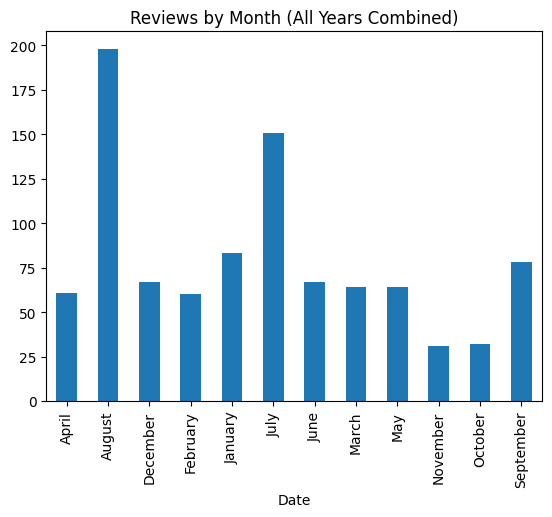

In [16]:
#Number of review overtime (2023-2025)
reviews_per_month = df.groupby(df['Date'].dt.month_name()).size()
reviews_per_month.plot(kind='bar', title="Reviews by Month (All Years Combined)")

<Axes: title={'center': 'Average Rating by Month (2025)'}, xlabel='Date', ylabel='Avg Rating'>

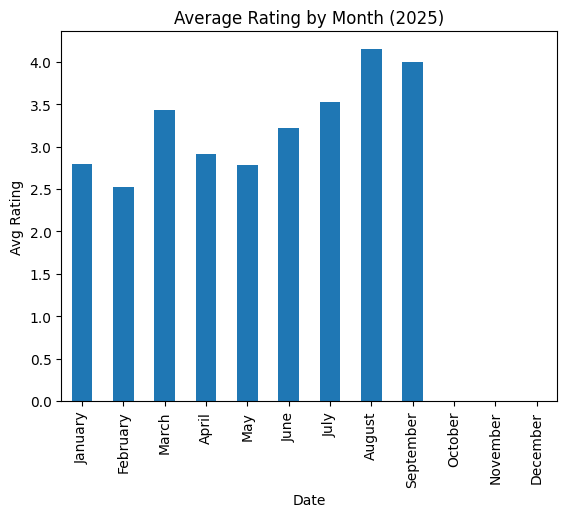

In [17]:
#Average rating by month 2025
avg_rating_2025 = (
    df[df['Date'].dt.year == 2025]
      .groupby(df['Date'].dt.strftime('%B'))['Review_rating']
      .mean()
      .reindex(['January','February','March','April','May','June',
                'July','August','September','October','November','December'])
)

avg_rating_2025.plot(kind='bar', title="Average Rating by Month (2025)", ylabel="Avg Rating")

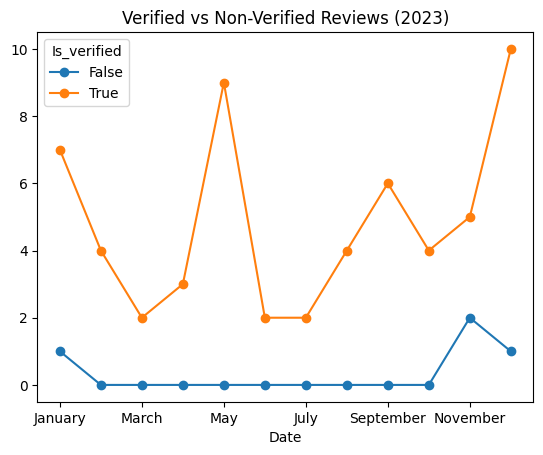

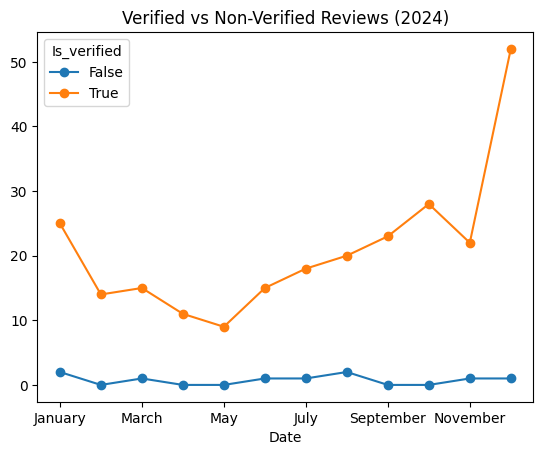

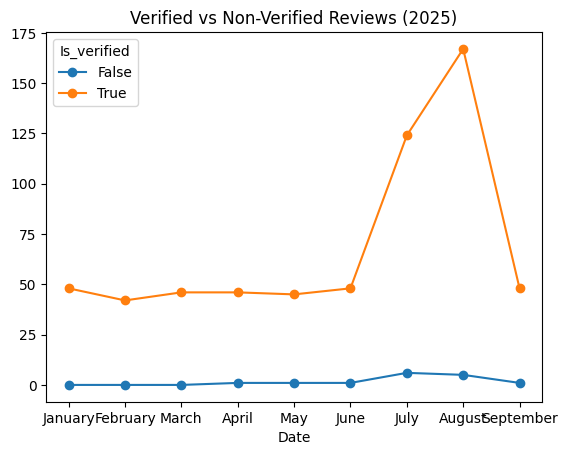

In [18]:
#Verifed vs non verified over time (2023-2025)
years = [2023, 2024, 2025]

trend = (df[df['Date'].dt.year.isin(years)]
         .groupby([df['Date'].dt.year, df['Date'].dt.strftime('%B'), 'Is_verified'])
         .size()
         .unstack(fill_value=0))

for year in years:
    trend.loc[year].reindex(['January','February','March','April','May','June',
                             'July','August','September','October','November','December']) \
        .plot(kind='line', marker='o', title=f"Verified vs Non-Verified Reviews ({year})")

In [19]:
#Installing Textblob
!pip install textblob
!python -m textblob.download_corpora

Defaulting to user installation because normal site-packages is not writeable
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\01\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [20]:
# Define a function to get sentiment
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))  # ensure input is string
    if analysis.sentiment.polarity > 0.1:
        return "Positive"
    elif analysis.sentiment.polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis to Review_content and Review_title
df['Content_Sentiment'] = df['Review_content'].apply(get_sentiment)
df['Title_Sentiment'] = df['Review_title'].apply(get_sentiment)

#Check results
print(df[['Review_title', 'Title_Sentiment', 'Review_content', 'Content_Sentiment']].head())

                    Review_title Title_Sentiment  \
0                   Good quality        Positive   
1               A beautiful item        Positive   
2       iPad cover for iPad 2025         Neutral   
3  Protect your apple investment         Neutral   
4           Fits the Bill Nicely        Positive   

                                      Review_content Content_Sentiment  
0  Nice color, good quality, amazing price, it fi...          Positive  
1  I'm delighted with the solid construction of t...          Positive  
2  This is a wonderful cover exactly what I neede...          Positive  
3  I fine and sturdy case that is very attractive...          Positive  
4  Quick delivery and arrived in good condition. ...          Positive  


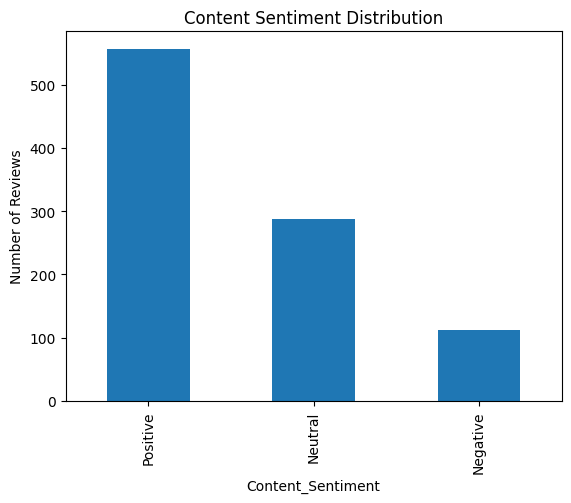

In [21]:
#Visualize sentiment distribution for content
import matplotlib.pyplot as plt

df['Content_Sentiment'].value_counts().plot(kind='bar', title="Content Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.show()

#Save the dataset with sentiment
df.to_csv("amazon_reviews_with_sentiment.csv", index=False)

In [25]:

# Save cleaned file
df.to_csv("C:\\Users\\01\\Downloads\\amazon_reviews_final.csv", index=False)
print("Cleaning done! ✅")

Cleaning done! ✅
